<a href="https://colab.research.google.com/github/Arun-Pat/MLZoomCamp_AP/blob/main/MLZoomCamp_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Dataset**
In this homework, we will use the California Housing Prices from Kaggle.
https://www.kaggle.com/datasets/camnugent/california-housing-prices

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [144]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [145]:
# wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
!wget $url

--2023-09-23 12:10:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.4’

housing.csv.4       100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2023-09-23 12:10:20 (21.5 MB/s) - ‘housing.csv.4’ saved [1423529/1423529]



In [146]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [147]:
df.median_house_value.min()

14999.0

In [148]:
df.median_house_value.max()

500001.0

In [149]:
df[df.median_house_value > 500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


<Axes: xlabel='median_house_value', ylabel='Count'>

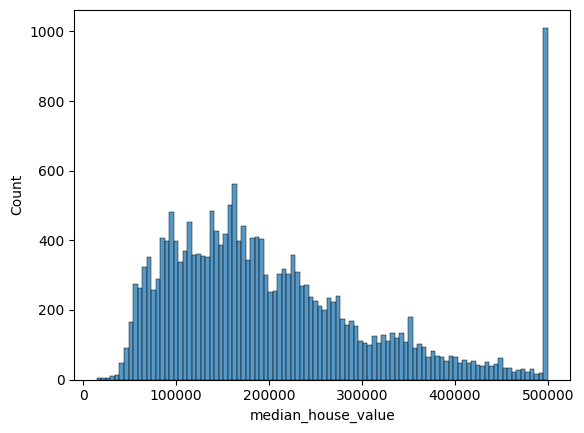

In [150]:
sns.histplot(df.median_house_value,bins=100)

# **Preparing the dataset**
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [151]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [152]:
df_orig = df.copy()
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

df = df[(df.ocean_proximity=='<1H OCEAN') | (df.ocean_proximity=='INLAND')] # Filter Data
df = df[columns] # Keep data in 9 columns and remove 'ocean_proximity' column data
df_orig


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [153]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# **Question 1**
There's one feature with missing values. What is it?



*  total_rooms
*  total_bedrooms  ✔
*  population
*  households

In [154]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# **Question 2**
What's the median (50% percentile) for variable 'population'?

* 995
* 1095
* 1195  ✔
* 1295

In [155]:
df.population.median()

1195.0

# **Prepare and split the dataset**
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the median_house_value variable using the np.* log1p() function.

In [156]:
n_tot = len(df) # rows in data
n_val = int(n_tot * 0.2)
n_test = int(n_tot * 0.2)
n_train = n_tot - n_val - n_test


idx = np.arange(n_tot) # Create array of size of dataframe rows and shuffle it
np.random.seed(42)
np.random.shuffle(idx)
idx


array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [157]:
# Split data into three sets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [158]:
len(df_train),len(df_val),len(df_test)

(9413, 3137, 3137)

In [159]:
# Given results for different data sets after applying log1p
y_train = np.log1p(df_train.median_house_value )
y_val = np.log1p(df_val.median_house_value )
y_test = np.log1p(df_test.median_house_value )

# **Question 3**
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good  ✔

In [160]:
# Linear regression without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [161]:
df_test.total_bedrooms.isnull().sum()

34

In [162]:
# Defined earlier
# columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [163]:
df_train[columns].mean()

latitude                  35.454722
longitude               -119.212927
housing_median_age        27.201955
total_rooms             2677.726548
total_bedrooms           542.552956
population              1476.874217
households               502.084458
median_income              3.806246
median_house_value    192744.803570
dtype: float64

In [164]:
df_train.total_bedrooms.isnull().sum()

94

In [165]:
def prepare_X(df,val=0):
    df_num = df[columns]
    df_num = df_num.fillna(val)
    X = df_num.values
    return X


In [166]:
# Set1. Fill the total_bedroom null value with 0
# X_train1 = df_train[columns].fillna(0).values
X_train1 = prepare_X(df_train)
w0, w = train_linear_regression(X_train1, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score1 = rmse(y_val, y_pred)
# score1=round(score1,2)
print(f'score1(Nan values filled with zeros) - {score1}')

# Set2. Fill the total_bedroom null value with mean value
mean_val = df_train[columns].mean()
X_train2 = prepare_X(df_train,mean_val)
w0, w = train_linear_regression(X_train2, y_train)

X_val = prepare_X(df_val,mean_val)
y_pred = w0 + X_val.dot(w)

score2 = rmse(y_val, y_pred)
# score2=round(score2,2)
print(f'score2 (Nan values filled with mean) - {score2}')




score1(Nan values filled with zeros) - 0.1736940266082351
score2 (Nan values filled with mean) - 0.17371162450509697


In [167]:
#  TO check if mean value is inserted
# cnt= 0
# z = 0
# for i in X_train2[:,4]:
#   if (i == 542.552956325786):
#     z+=1
#   cnt+=1
# print(cnt)
# print(z)


# **Question 4**

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

* 0  
* 0.000001  ✔
* 0.001
* 0.0001

In [168]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [169]:
r_val = [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
output=[]
for r in r_val:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    # output.append([r,w0,score])
    output.append([r,w0,round(score,2)])

    # print(f'r: {r},w0: {w0}, rmse: {score}')
    print(f'r: {r},w0: {w0}, rmse: {round(score,2)}')


min_rmse = min(l[2] for l in output)
min_rmse_element = next(filter(lambda x: x[2] == min_rmse, output), None)

# for ixn in range(len(output)):
#   if(output[ixn][2]==min_rmse):
#     min_r=output[ixn][0]

print(f'\nMin r is {min_rmse_element[0]} and Min_rmse is {min_rmse}')



r: 0.0,w0: 3.937606715149649, rmse: 0.17
r: 1e-06,w0: 3.9375974960408504, rmse: 0.17
r: 0.0001,w0: 3.9366850019087334, rmse: 0.17
r: 0.001,w0: 3.928408969042227, rmse: 0.17
r: 0.01,w0: 3.8475243167626387, rmse: 0.17
r: 0.1,w0: 3.1906770449214537, rmse: 0.17
r: 1,w0: 1.1797526480890979, rmse: 0.17
r: 5,w0: 0.3121355213322767, rmse: 0.18
r: 10,w0: 0.16372791639997053, rmse: 0.18

Min r is 0.0 and Min_rmse is 0.17


# **Question 5**

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

* 0.5
* 0.05
* 0.005 ✔
* 0.0005

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [173]:
# n_tot = len(df) # rows in data
# n_val = int(n_tot * 0.2)
# n_test = int(n_tot * 0.2)
# n_train = n_tot - n_val - n_test
# print(f'{n_tot} {n_train} {n_val} {n_test}')

result=[]
seed_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seed_val:
    idx = np.arange(n_tot) # Create array of size of dataframe rows and shuffle it
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Optional code to reset indexes
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Split data into three sets
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # Given results for different data sets after applying log1p
    y_train = np.log1p(df_train.median_house_value )
    y_val = np.log1p(df_val.median_house_value )
    y_test = np.log1p(df_test.median_house_value )

    X_train = prepare_X(df_train) # Prepare using Train
    w0, w = train_linear_regression(X_train, y_train) # Find weights

    X_val = prepare_X(df_val) # Prepare using val
    y_pred = w0 + X_val.dot(w) # Run Model to predict the output

    score = rmse(y_val, y_pred)
    result.append([seed,score])
    print(f'Seed: {seed}, rmse: {score}')

    # result.append([seed,round(score,3)])
    # print(f'Seed: {seed},rmse: {round(score,3)}')

arr = np.array(result)
std = np.std(arr[:,1])
print(f'\nStandard Deviation is: {round(std,3)}')


15687 9413 3137 3137
Seed: 0, rmse: 0.17213774782691188
Seed: 1, rmse: 0.17034633901880156
Seed: 2, rmse: 0.17165703221833686
Seed: 3, rmse: 0.16170941189304322
Seed: 4, rmse: 0.16974336556625522
Seed: 5, rmse: 0.1741012502302792
Seed: 6, rmse: 0.16970803487141434
Seed: 7, rmse: 0.17312646461539977
Seed: 8, rmse: 0.17780161011928872
Seed: 9, rmse: 0.1674466519352844

Standard Deviation is: 0.004


# **Question 6**

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.13
* 0.23
* 0.33
* 0.43

In [175]:
# print(f'{n_tot} {n_train} {n_val} {n_test}')
# Optional code to reset indexes
# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

s = 9
r = 0.001

idx = np.arange(n_tot) # Create array of size of dataframe rows and shuffle it
np.random.seed(s)
np.random.shuffle(idx)


df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_full_train = pd.concat([df_train, df_val]) # combine train+val

# Given results for different data sets after applying log1p
y_train = np.log1p(df_train.median_house_value )
y_val = np.log1p(df_val.median_house_value )
y_test = np.log1p(df_test.median_house_value )

X_full_train = prepare_X(df_full_train) # Prepare using Train + val
y_full_train = np.concatenate([y_train, y_val])# Concatenate Train and val

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)

X_test = prepare_X(df_test) # Prepare using test
y_pred = w0 + X_test.dot(w) # Run Model to predict the output

score = rmse(y_test, y_pred)
print(f'rmse is: {score}')

rmse is: 0.1655679512184976
